In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3 as sqlite
from sqlalchemy import create_engine


Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [5]:
df_foursquare = pd.read_csv('foursquare_data.csv')
df_yelp = pd.read_csv('yeld_data.csv')

# Will only be getting first 10 rows from foursquare because i only have 10 from yelp

In [13]:
merged_df = pd.merge(df_foursquare, df_yelp, on=['latitude', 'longitude'])
merged_df.rename(columns={'Number of Parks found_x': 'Number of Parks found (FourSquare)', 'Distance to Closest Park_x': 'Distance to Closest Park (FourSquare)', 'Number of Parks found_y': 'Number of Parks found (Yelp)', 'Distance to Closest Park_y': 'Distance to Closest Park (Yelp)'}, inplace=True)
merged_df

,latitude,longitude,Number of Parks found (FourSquare),Distance to Closest Park (FourSquare),Number of Parks found (Yelp),Distance to Closest Park (Yelp)
0,43.665269,-79.319796,5,63.0,3,73.308008
1,43.671420,-79.445947,6,61.0,1,500.794541
2,43.666224,-79.317693,10,138.0,5,258.478643
3,43.653236,-79.376716,9,214.0,4,340.683204
4,43.663722,-79.380288,10,163.0,12,198.441814
5,43.657763,-79.389165,2,307.0,5,288.293606
6,43.656729,-79.382736,8,270.0,6,264.774708
7,43.664467,-79.414783,6,253.0,3,50.869729
8,43.675492,-79.388858,7,48.0,5,60.405338
9,43.674991,-79.396273,8,164.0,2,11936.443958


In [32]:
merged_df.to_csv('merged_df.csv', index=False)

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

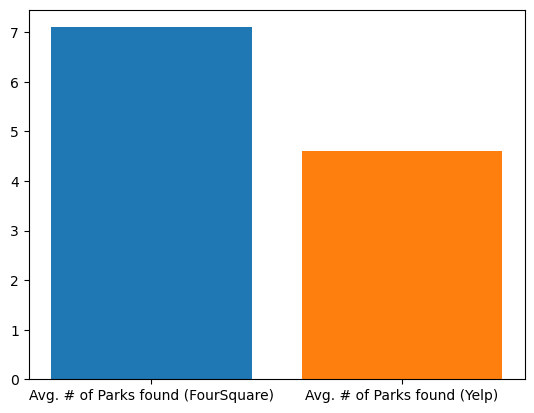

In [31]:
x = 'Avg. # of Parks found (FourSquare)'
x2 = 'Avg. # of Parks found (Yelp)'
plt.bar(x, merged_df['Number of Parks found (FourSquare)'].mean())
plt.bar(x2, merged_df['Number of Parks found (Yelp)'].mean())


plt.show()

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [51]:
conn = sqlite.connect('stats_project.db')
merged_df.to_sql('mergered_foursquare_yelp', conn, index=False, if_exists='replace')


10

In [52]:
engine = create_engine('sqlite:///data/stats_project.db')


In [58]:
query = 'SELECT * FROM mergered_foursquare_yelp'
result_df = pd.read_sql_query(query, conn)

print(result_df.to_string(index=False))


 latitude  longitude  Number of Parks found (FourSquare)  Distance to Closest Park (FourSquare)  Number of Parks found (Yelp)  Distance to Closest Park (Yelp)
43.665269 -79.319796                                   5                                   63.0                             3                        73.308008
43.671420 -79.445947                                   6                                   61.0                             1                       500.794541
43.666224 -79.317693                                  10                                  138.0                             5                       258.478643
43.653236 -79.376716                                   9                                  214.0                             4                       340.683204
43.663722 -79.380288                                  10                                  163.0                            12                       198.441814
43.657763 -79.389165                          

Look at the data before and after the join to validate your data.

In [ ]:
# The data resembles what was seen in the merged_df dataframe that was created